In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pwd

'/Users/collinswestnedge/programming/Metis_Online/project_02'

In [17]:
df = pd.read_csv('/Users/collinswestnedge/programming/Metis_Online/project_02/clean_data/chicago_full_clean.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)

In [19]:
df.head(5)

,Type,Year built,Heating,Cooling,Parking,Total Price,Address,New construction,Bedrooms,Bathrooms,Full bathrooms,neighborhood_stats,URL,Lot,Square Feet,HOA,Half bathrooms,Status
0,Multi Family,1921.0,Forced air,None,2 spaces,279900.0,"5931 S Campbell Ave, Chicago, IL 60629",No,6,3.0,3.0,Home values in Chicago Lawn have risen 0.6% ()...,https://www.zillow.com/homedetails/5931-S-Camp...,NaN,NaN,NaN,0,For Sale
1,Single Family,1924.0,Gas,Central,2 spaces,138970.0,"11117 S Sawyer Ave, Chicago, IL 60655",No,3,1.0,1.0,Home values in Mount Greenwood have risen 0.6%...,https://www.zillow.com/homedetails/11117-S-Saw...,3789.0,988.0,NaN,0,For Sale
2,Multi Family,1930.0,Forced air,None,NaN,99900.0,"7151 S Green St, Chicago, IL 60621",No,6,2.0,2.0,Home values in Englewood have risen 0.6% () ov...,https://www.zillow.com/homedetails/7151-S-Gree...,NaN,NaN,NaN,0,For Sale
3,Single Family,1898.0,Gas,None,1 space,39900.0,"620 W 60th St, Chicago, IL 60621",No,4,2.0,2.0,Home values in Englewood have risen 0.6% () ov...,https://www.zillow.com/homedetails/620-W-60th-...,3301.0,1498.0,NaN,0,For Sale
4,Condo,1934.0,Forced air,None,NaN,168900.0,"5148 N Monitor Ave APT 202, Chicago, IL 60630",No,2,1.0,1.0,Home values in Jefferson Park have risen 0.6% ...,https://www.zillow.com/homedetails/5148-N-Moni...,NaN,1000.0,234.0,0,For Sale


In [20]:
df.dtypes

Type                   object
Year built            float64
Heating                object
Cooling                object
Parking                object
Total Price           float64
Address                object
New construction       object
Bedrooms                int64
Bathrooms             float64
Full bathrooms        float64
neighborhood_stats     object
URL                    object
Lot                   float64
Square Feet           float64
HOA                   float64
Half bathrooms          int64
Status                 object
dtype: object

In [24]:
continous_data = df.select_dtypes(['float64', 'int64'])
continous_data.head(5)

,Year built,Total Price,Bedrooms,Bathrooms,Full bathrooms,Lot,Square Feet,HOA,Half bathrooms
0,1921.0,279900.0,6,3.0,3.0,NaN,NaN,NaN,0
1,1924.0,138970.0,3,1.0,1.0,3789.0,988.0,NaN,0
2,1930.0,99900.0,6,2.0,2.0,NaN,NaN,NaN,0
3,1898.0,39900.0,4,2.0,2.0,3301.0,1498.0,NaN,0
4,1934.0,168900.0,2,1.0,1.0,NaN,1000.0,234.0,0


In [26]:
categorical_data = df.select_dtypes(['object'])
categorical_data.head(5)

,Type,Heating,Cooling,Parking,Address,New construction,neighborhood_stats,URL,Status
0,Multi Family,Forced air,None,2 spaces,"5931 S Campbell Ave, Chicago, IL 60629",No,Home values in Chicago Lawn have risen 0.6% ()...,https://www.zillow.com/homedetails/5931-S-Camp...,For Sale
1,Single Family,Gas,Central,2 spaces,"11117 S Sawyer Ave, Chicago, IL 60655",No,Home values in Mount Greenwood have risen 0.6%...,https://www.zillow.com/homedetails/11117-S-Saw...,For Sale
2,Multi Family,Forced air,None,NaN,"7151 S Green St, Chicago, IL 60621",No,Home values in Englewood have risen 0.6% () ov...,https://www.zillow.com/homedetails/7151-S-Gree...,For Sale
3,Single Family,Gas,None,1 space,"620 W 60th St, Chicago, IL 60621",No,Home values in Englewood have risen 0.6% () ov...,https://www.zillow.com/homedetails/620-W-60th-...,For Sale
4,Condo,Forced air,None,NaN,"5148 N Monitor Ave APT 202, Chicago, IL 60630",No,Home values in Jefferson Park have risen 0.6% ...,https://www.zillow.com/homedetails/5148-N-Moni...,For Sale


In [28]:
for col in categorical_data.columns.to_list():
    print(col)
    print(categorical_data[col].unique())
    print()

Type
['Multi Family' 'Single Family' 'Condo' 'Multiple Occupancy' 'Townhouse'
 'Apartment']

Heating
['Forced air' 'Gas' 'Forced air, Gas' nan 'Radiant, Gas' 'Electric, Gas'
 'Baseboard, Forced air' 'Baseboard' 'Other' 'Baseboard, Radiant, Gas'
 'Radiant' 'Forced air, Heat pump' 'Heat pump' 'Baseboard, Radiant'
 'Electric' 'Other, Gas' 'Forced air, Other' 'Forced air, Electric'
 'Forced air, Electric, Gas' 'Baseboard, Electric'
 'Baseboard, Forced air, Gas' 'Gas, Other'
 'Forced air, Heat pump, Electric' 'Radiant, Electric'
 'Baseboard, Gas, Other' 'Wall, Electric' 'Other, Radiant'
 'Baseboard, Gas' 'Forced air, Radiant']

Cooling
['None' 'Central' 'Refrigeration' 'Other' 'Wall' 'Central, Other']

Parking
['2 spaces' nan '1 space' '3 spaces' '4 spaces' '6 spaces' '42 spaces'
 'Attached Garage' '5 spaces' '7 spaces' '8 spaces' 'On street'
 'Detached Garage' '15 spaces']

Address
['5931 S Campbell Ave, Chicago, IL 60629'
 '11117 S Sawyer Ave, Chicago, IL 60655'
 '7151 S Green St, Chicago

In [34]:
# still need to figure out what to do with neighborhood stats and 
# parking/heating but for now will encode the rest
encodable_features = categorical_data[['Status', 'New construction', 'Cooling', 'Type']]
enc_data = pd.get_dummies(encodable_features)
enc_data

,Status_For Sale,Status_Sold,New construction_ No,New construction_ Yes,Cooling_Central,"Cooling_Central, Other",Cooling_None,Cooling_Other,Cooling_Refrigeration,Cooling_Wall,Type_Apartment,Type_Condo,Type_Multi Family,Type_Multiple Occupancy,Type_Single Family,Type_Townhouse
0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0
2,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
3,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
4,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1064,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0
1065,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0
1066,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0
1067,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0


In [41]:
encoded_df = continous_data.join(enc_data)
encoded_df.corr()['Total Price'].sort_values(ascending=False)

Total Price                1.000000
Square Feet                0.669794
Bathrooms                  0.644490
Full bathrooms             0.559804
Half bathrooms             0.393242
HOA                        0.297219
Bedrooms                   0.255721
New construction_ Yes      0.218102
Cooling_Central            0.211078
Year built                 0.142014
Lot                        0.067041
Type_Townhouse             0.043619
Type_Multiple Occupancy    0.039246
Type_Single Family         0.028723
Type_Apartment             0.015004
Type_Multi Family          0.012411
Status_For Sale            0.009707
Cooling_Central, Other     0.004284
Status_Sold               -0.009707
Cooling_Refrigeration     -0.030028
Cooling_Wall              -0.030711
Cooling_Other             -0.059292
Type_Condo                -0.068486
Cooling_None              -0.190408
New construction_ No      -0.218102
Name: Total Price, dtype: float64

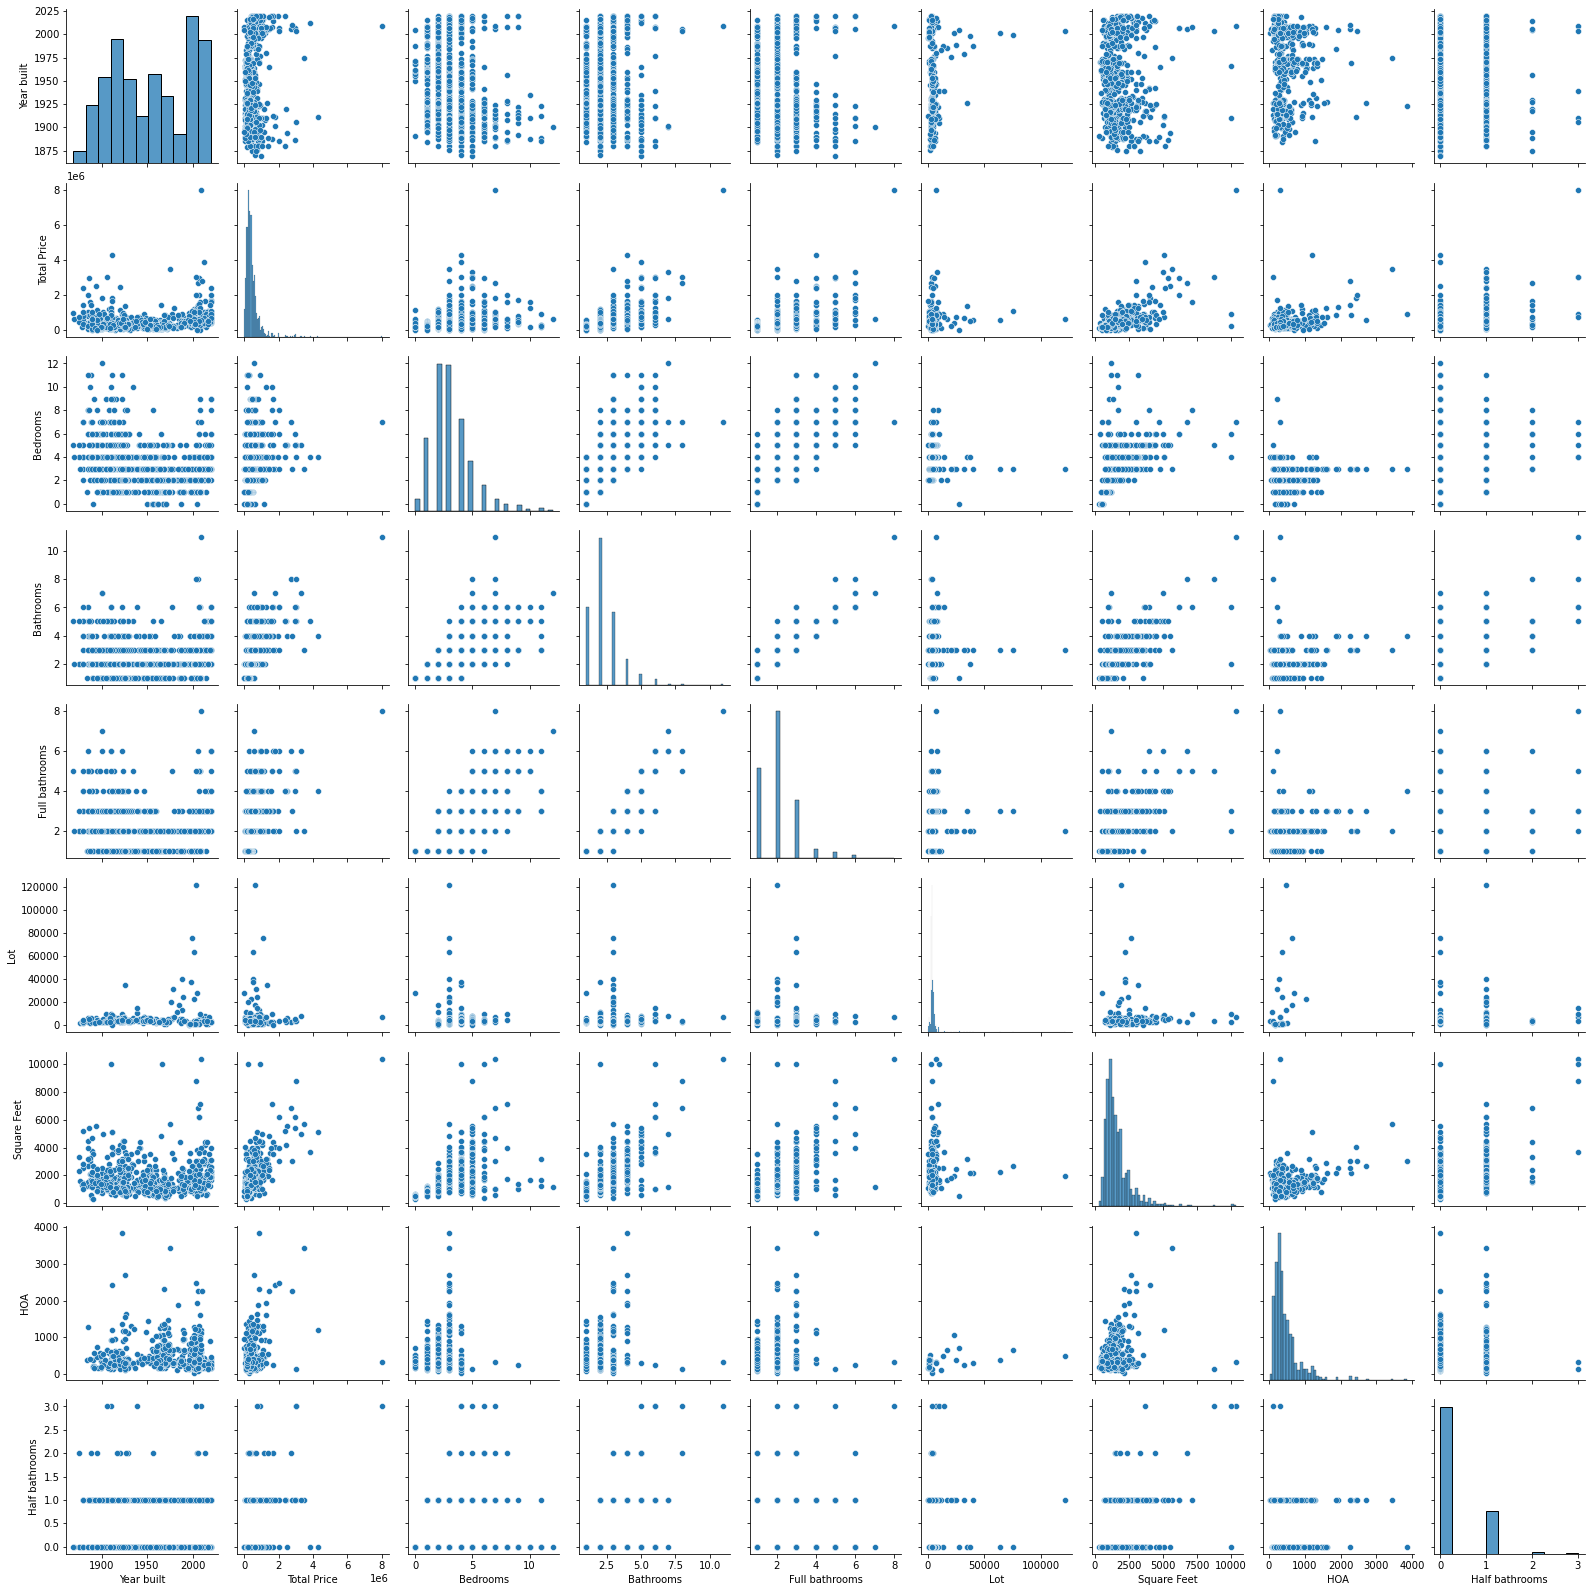

In [46]:
sns.pairplot(continous_data)
plt.savefig('features_pairplot.pdf')